# UNDER CONSTRUCTION - PLEASE CHECK WITH THE DEVELOPERS

In [1]:
import oatpy as oat

import plotly.graph_objects as go
import numpy as np
import networkx as nx
import hypernetx as hnx
import scipy
import sklearn

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


# Define a random hypergraph

In [2]:
# set a random seed
import random
random.seed(1)

In [3]:
# define a random hypergraph
import random
random.seed(2)

num_vertices        =   10

vertices            = list(range(num_vertices))
edgecard            = list(range(0,8))
E = { str(p): random.sample(vertices, random.choice(edgecard)) for p in range(100) }

print(E)

{'0': [], '1': [1], '2': [2, 4, 8, 7, 1], '3': [], '4': [6, 9], '5': [8, 7, 4, 0, 6], '6': [7, 5, 6, 3, 4], '7': [8, 2], '8': [3, 0, 2], '9': [2, 9, 5, 4, 7], '10': [7, 6], '11': [9, 5, 8, 6, 3], '12': [6, 7], '13': [7, 4, 9], '14': [7, 9, 5, 4, 8], '15': [7, 3, 5, 6, 9, 1, 2], '16': [4, 9, 6, 2, 5, 1, 3], '17': [9, 1, 5, 7, 0], '18': [1, 0, 8], '19': [9, 3, 1, 6], '20': [4, 3], '21': [0, 6, 9], '22': [], '23': [5, 2, 3, 9, 0], '24': [1], '25': [0], '26': [], '27': [], '28': [4, 2, 8, 5, 1], '29': [], '30': [9, 0, 3, 1, 8, 5], '31': [9, 1, 4, 2, 3], '32': [], '33': [7, 8, 0, 2], '34': [9, 2, 7, 1, 0, 8], '35': [0], '36': [2, 8, 6, 3, 4, 9, 1], '37': [4, 9, 6, 5, 0], '38': [0, 4], '39': [], '40': [2, 9], '41': [7], '42': [8, 0, 3], '43': [7, 1, 4], '44': [9], '45': [9, 5, 4], '46': [4, 8, 0, 1, 7, 3], '47': [2, 1, 8, 7, 0, 5], '48': [], '49': [3, 1], '50': [0, 8, 7], '51': [4, 8, 6, 1, 5, 7, 3], '52': [8, 0, 9, 3, 4, 5], '53': [1, 7], '54': [0, 8, 1, 4, 2], '55': [5, 4, 0, 6], '56': [1,

In [4]:
# import random
# random.seed(1)

# num_vertices        =   10

# vertices            =   list(range(num_vertices))   # vertices will be integers 0 - 9
# edgecard            =   list(range(0,8))            # list of allowed edge cardinalities

# E = { str(p): random.sample(vertices, random.choice(edgecard)) for p in range(100) }

# display(E)

In [5]:
# collapse out redundant information, returning a list of lists
reduced_hg, label_translator = oat.hypergraph.reduce_hypergraph_with_labels(E)

# The label_translator object contains the information about what edge 
# (respectively, node) in the original hypergraph maps to which edge
# (respectively, node) in the reduced hypergraph.

for key in label_translator.keys(): print(key)

old_node_to_new_node
old_edge_to_new_edge
new_node_to_old_nodes
new_edge_to_old_edges


/Users/roek189/python_virtual_environments/oat/lib/python3.11/site-packages/hypernetx/classes/entity.py:575: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/Users/roek189/python_virtual_environments/oat/lib/python3.11/site-packages/hypernetx/classes/entity.py:575: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.groupby(col1)[col2].unique().to_dict()
/Users/roek189/python_virtual_environments/oat/lib/python3.11/site-packages/hypernetx/classes/entity.py:575: FutureWarning: The default of observed=False is deprecated and wi

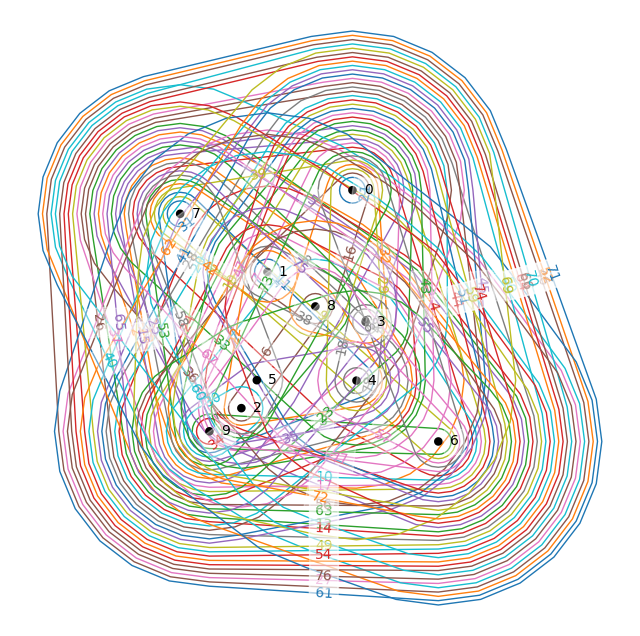

In [6]:
# plot the hypergraph

hnxgraph = hnx.Hypergraph(reduced_hg)
hnx.drawing.draw(hnxgraph)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

<class 'networkx.utils.decorators.argmap'> compilation 28:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


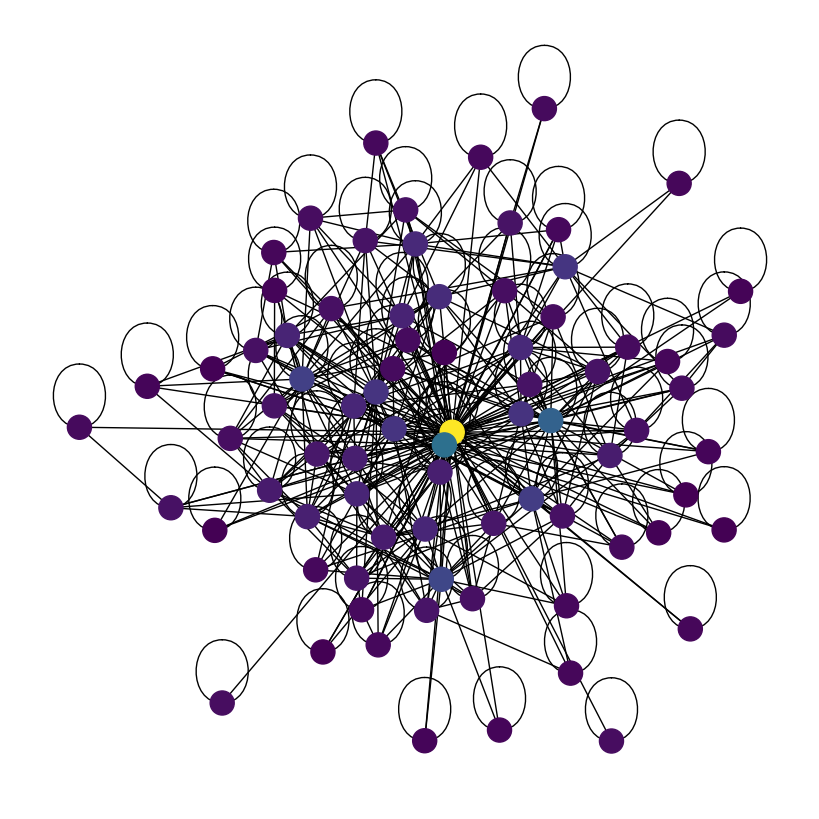

In [7]:
random.seed(1)

# generate node birth times using networkx (not hypernetx) centrality

# compute the adjacency matrix of the nerve poset (where vertices are hyperedges and edges correspond to set containment)    
adj                 =   oat.hypergraph.edge_containment_relation_symmetrized( reduced_hg ) 
display(adj.toarray()) 

# compute a networkx graph for this adjacency matrix
nxgraph             =   nx.Graph(adj)

# compute the node centralities of this graph
nodecentralities    =   nx.current_flow_betweenness_centrality(nxgraph)
nodecentralities    =   [nodecentralities[p] for p in range(len(nodecentralities))]

# draw the graph with nodes colored by centrality
nx.draw(nxgraph, node_color = nodecentralities, )


In [8]:
# define a sparse "distance" matrix such that the distance between 
# two points is either infinite (if they aren't connected in the graph) 
# or equal to the maximum of the birth times of the two points.


# assign the birthtime of each vertex to equal its centrality
node_births                 =   np.array(nodecentralities)

# define a sparse "dissimilarity" matrix, where non-adjacent eges do not have explicit entries
dissimilarity_matrix        =   oat.hypergraph.edge_containment_relation_symmetrized( reduced_hg )

# convert from int to float
dissimilarity_matrix.data   =   dissimilarity_matrix.data.astype(float, copy=False) 

# asign each edge the maximum value of its two vertices
dissimilarity_matrix_coo    =   scipy.sparse.coo_matrix(dissimilarity_matrix) # use this function to get column indices
for row, col in zip( dissimilarity_matrix_coo.row, dissimilarity_matrix_coo.col ):
    dissimilarity_matrix[row,col]   =   np.maximum( nodecentralities[row], nodecentralities[col], )


print(f"dissimilarity_matrix =")
print(dissimilarity_matrix.toarray())
print(dissimilarity_matrix.shape)

dissimilarity_matrix =
[[0.4100171  0.4100171  0.4100171  ... 0.4100171  0.4100171  0.4100171 ]
 [0.4100171  0.1608952  0.1608952  ... 0.1608952  0.         0.        ]
 [0.4100171  0.1608952  0.01859223 ... 0.         0.         0.        ]
 ...
 [0.4100171  0.1608952  0.         ... 0.06417119 0.         0.        ]
 [0.4100171  0.         0.         ... 0.         0.02534733 0.        ]
 [0.4100171  0.         0.         ... 0.         0.         0.03197318]]
(79, 79)


In [9]:
#   SET PARAMETER VALUES
maxdim              =   4

#   FACTOR THE BOUNDARY MATRIX
factored            =   oat.rust.FactoredBoundaryMatrixVr( 
                                dissimilarity_matrix    =   dissimilarity_matrix,
                                homology_dimension_max  =   maxdim,
                            )
#   EXTRACT HOMOLOGY
homology    =   factored.homology(                         
                return_cycle_representatives    =   True,  
                return_bounding_chains          =   True,  
            )

#   PLOT THE BARCODE
fig_pd              =   oat.plot.pd( homology )
fig_pd.show()

# Print homology information

In [10]:
display(homology)

dimension     birth     death birth simplex    death simplex  \
id                                                                  
0            0  0.035396  0.037486          [33]         [32, 41]   
1            0  0.033253  0.036766          [41]         [35, 45]   
2            0  0.032502  0.034669          [17]         [24, 27]   
3            0  0.031973  0.410017          [78]          [0, 78]   
4            0  0.031973  0.410017           [8]           [0, 8]   
..         ...       ...       ...           ...              ...   
133          1  0.046145  0.160895      [42, 49]      [1, 42, 49]   
134          1  0.042865  0.410017      [68, 70]      [0, 21, 70]   
135          2  0.160895  0.410017   [1, 42, 70]  [0, 31, 42, 70]   
136          2  0.160895  0.410017   [1, 42, 54]  [0, 31, 42, 54]   
137          2  0.160895  0.410017   [1, 42, 52]  [0, 31, 42, 52]   

                                  cycle representative  cycle nnz  \
id                                                                  
0      simplex  filtration coefficient
0    [33]   ...          2   
1      simplex  filtration coefficient
0    [41]   ...          2   
2      simplex  filtration coefficient
0    [17]   ...          2   
3      simplex  filtration coefficient
0    [78]   ...          2   
4      simplex  filtration coefficient
0     [8]   ...          2   
..                                                 ...        ...   
133      simplex  filtration coefficient
0  [42, 49...          6   
134      simplex  filtration coefficient
0  [68, 70...          6   
135          simplex  filtration coefficient
0   [1...          8   
136          simplex  filtration coefficient
0   [1...          8   
137          simplex  filtration coefficient
0   [1...          8   

                                        bounding chain  bounding nnz  
id                                                                    
0        simplex  filtration coefficient
0  [32, 41...           5.0  
1        simplex  filtration coefficient
0  [35, 45...           2.0  
2        simplex  filtration coefficient
0  [24, 27...           2.0  
3       simplex  filtration coefficient
0  [0, 78] ...           3.0  
4      simplex  filtration coefficient
0  [0, 8]   ...           3.0  
..                                                 ...           ...  
133          simplex  filtration coefficient
0   [1...          10.0  
134          simplex  filtration coefficient
0   [0...          10.0  
135             simplex  filtration coefficient
0  ...           8.0  
136             simplex  filtration coefficient
0  ...           8.0  
137             simplex  filtration coefficient
0  ...           8.0  

[138 rows x 9 columns]

# Print a cycle representative

In [11]:
display(homology["cycle representative"][121])

simplex  filtration coefficient
0  [42, 54]    0.053078           1
1  [33, 54]    0.053078          -1
2  [42, 52]    0.052108          -1
3  [33, 52]    0.052108           1

# Plot a cycle with MDS

Extract the feature number for the longest-lived 2-dimensional feature

In [12]:
dim                         =   2
lifespans                   =   [ ( homology["death"][p] - homology["birth"][p], p ) for p in range(homology.shape[0]) if homology["dimension"][p]==dim ]
(lifespan,feature_index)    =   max(lifespans)

Inspect the cycle representative

In [13]:
display("Cycle representative", homology["cycle representative"][feature_index] )

'Cycle representative'

simplex  filtration coefficient
0   [1, 42, 52]    0.160895          -1
1   [1, 42, 46]    0.160895           1
2   [1, 33, 52]    0.160895           1
3   [1, 33, 46]    0.160895          -1
4  [31, 42, 52]    0.102108           1
5  [31, 42, 46]    0.102108          -1
6  [31, 33, 52]    0.102108          -1
7  [31, 33, 46]    0.102108           1

Extract the list of all triangles that are faces of a at least one simplex in the support of the cycle rep

In [14]:
cycle               =   homology["cycle representative"][feature_index]
simplices           =   np.array( cycle["simplex"].tolist() )
triangles           =   oat.simplex.dmsimplicesasrows__dnfacesasrows(simplices, facedim=2, removeduplicatefaces=True)
edges               =   oat.simplex.dmsimplicesasrows__dnfacesasrows(simplices, facedim=1, removeduplicatefaces=True)
vertices            =   oat.simplex.dmsimplicesasrows__dnfacesasrows(simplices, facedim=0, removeduplicatefaces=True)

#### Plot the cycle within the cloud

In [15]:
# generate 3d coordinates for the vertices of the ambient graph, using MDS on hop distance
# NB: coo stands for coordinate oracle; it's a dictionary whose keys are vertices
coo                 =   oat.plot.hop_mds_from_nx_graph(nxgraph)
x,y,z               =   zip(*coo.values()) # extract the x-y-z coordinates from the dictionary

# build the trace
data                =   [ go.Scatter3d(x=x,y=y,z=z, mode="markers", marker=dict(size=5)) ]
for triangle in triangles:
    trace                   =   oat.plot.triangle__trace3d( triangle=triangle, coo=coo )
    trace.update(opacity    =   0.5 )
    data.append(trace)

fig                 =   go.Figure(data)
fig.update_layout(width=800, height=800, title=dict(text="Persistent homology class"))
fig.show()  

/Users/roek189/python_virtual_environments/oat/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



#### Add vertex labels

In [16]:
text = [ str(v) for v in label_translator["new_edge_to_old_edges"] ]

fig.data[0].update( mode="markers+text", text=text )
fig.show()

#### Plot the feature alone

In [17]:
# generate 3d coordinates for the vertices of the cycle, using MDS on hop distance
# NB: coo stands for coordinate oracle; it's a dictionary whose keys are vertices
coo                 =   oat.plot.hop_mds_from_simplices(triangles)
x,y,z               =   zip(*coo.values())

# text labels for the vertices
text = [ str(label_translator["new_edge_to_old_edges"][p]) for p in coo.keys() ]

# build the trace
data                =   [ go.Scatter3d(x=x,y=y,z=z, mode="markers+text", marker=dict(size=5), text=text) ]
for triangle in triangles:
    trace                   =   oat.plot.triangle__trace3d( triangle=triangle, coo=coo )
    trace.update(opacity    =   0.5 )
    data.append(trace)

fig                 =   go.Figure(data)
fig.update_layout(width=800, height=800, title=dict(text="Persistent homology class"))
fig.show()  

/Users/roek189/python_virtual_environments/oat/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



#### Switch to orthographic projection (remove perspective)

In [18]:
fig.update_layout(
    scene = dict(
        aspectratio=go.layout.scene.Aspectratio(x=1, y=1, z=1), # controls zoom
        xaxis = dict(range=[-1, 1],), # x axis limits
        yaxis = dict(range=[-1, 1],), # y axis limits
        zaxis = dict(range=[-1, 1],), # z axis limits
        camera=dict(
            projection=dict(
                type='orthographic'
            )
        )        
    ),    
)
fig.show()